In [51]:
import pandas as pd
import requests
from io import BytesIO
import xgboost as xgb
from category_encoders import TargetEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from IPython.display import display
from sklearn import metrics
import advertools as adv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import plotly.express as px
import pickle
from xgboost import plot_importance
import plotly.graph_objects as go
import warnings
import optuna
from fitter import Fitter
warnings.filterwarnings('ignore')
import matplotlib. pyplot as plt 

In [94]:
# bos yazan veriler kaldırılmış
# Sütun isimlerindeki boşluklar _ ile doldurulmuş veri
df = pd.read_csv("ismek_kursiyer_veri.csv")
df2 = df.copy()

In [53]:
df.head(10)

,Donem,Egitim_Durumu,Engel_Durumu,Calisma_Durumu,Alan,Program,Hak_Edilen_Belge_Tipi,Kurs_Merkezi,Kurs_Merkezi_İlcesi,Tercih_Sebebi,Yas_Araligi
0,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi
1,2019-2020,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde İlerlemek",30-40 Yas Arasi
3,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
5,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Ismek Sertifika,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
6,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Ismek Sertifika,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
7,2019-2020,Lise,Engeli Olmayan,Calismiyor,Moda Tasarimi Ve Tekstil Teknolojisi,Giyim Uretiminde Temel Islemler,Hak Etmedi,Bagcilar Kirazli,Bagcilar,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi
8,2019-2020,Lisans,Engeli Olmayan,Calismiyor,Gastronomi Ve Mutfak Sanatlari,Hamur Teknikleri,Hak Etmedi,K.Cekmece Halkali Toplu Konutlar,Kucukcekmece,Uretim Yaparak Gelir Elde Etmek,40-50 Yas Arasi
9,2019-2020,Lisans,Engeli Olmayan,Calismiyor,Gastronomi Ve Mutfak Sanatlari,Pastaci Ciragi,Meb Sertifika,K.Cekmece Halkali Toplu Konutlar,Kucukcekmece,Uretim Yaparak Gelir Elde Etmek,40-50 Yas Arasi


In [54]:
df = df.drop(["Donem", "Engel_Durumu"], axis=1)

In [55]:
df

,Egitim_Durumu,Calisma_Durumu,Alan,Program,Hak_Edilen_Belge_Tipi,Kurs_Merkezi,Kurs_Merkezi_İlcesi,Tercih_Sebebi,Yas_Araligi
0,Lisans,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi
1,Lise,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,Lisans,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde İlerlemek",30-40 Yas Arasi
3,Lisans,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,Lisans,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
...,...,...,...,...,...,...,...,...,...
215173,Lisans,Calismiyor,Bilisim Teknolojileri,Powerpoint 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi
215174,Lisans,Ogrenci,Grafik Ve Teknik Tasarim,Illustrator Cizim Uygulamalari 3,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi
215175,Lisans,Ogrenci,Bilisim Teknolojileri,Egitimde Google Classroom Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi
215176,Lisans,Ogrenci,Bilisim Teknolojileri,Excel 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi


# create new features

In [56]:
def Uzaktan(df):
    if df["Kurs_Merkezi"] == "Uzaktan_Egitim":
        return 1
    else:
        return 0
    
df["Uzaktan"] = df.apply(lambda df:Uzaktan(df), axis=1)

In [57]:
def Meslek(df):
    if df["Tercih_Sebebi"] == "Meslek Edinmek, Meslegimde İlerlemek" or df["Tercih_Sebebi"] == "Uretim Yaparak Gelir Elde Etmek" or df["Tercih_Sebebi"] == "Yeni Bir Meslek Edinmek":
        return 1
    else:
        return 0
    
df["Meslek"] = df.apply(lambda df:Meslek(df), axis=1)
# burada aynı zamanda Tercih sebebi bu olanlar , tercih sebebi içinde aynı kategori altında gruplandırabilinir
# bununla aynı şey mi olur?

In [58]:
def Calisan(df):
    if df["Calisma_Durumu"] == "Calisiyor":
        return 1
    else:
        return 0
    
df["Calisan"] = df.apply(lambda df:Calisan(df), axis=1)

In [59]:
def GencKursiyer(df):
    if df["Yas_Araligi"] == "20-30 Yas Arasi":
        return 1
    else:
        return 0
    
df["GencKursiyer"] = df.apply(lambda df:GencKursiyer(df), axis=1)

In [60]:
def Haketme(df):
    if df["Hak_Edilen_Belge_Tipi"] == "Ismek_Sertifika" or df["Hak_Edilen_Belge_Tipi"] == "Meb Sertifika":
        return 1
    else:
        return 0
    
df["Haketme"] = df.apply(lambda df:Haketme(df), axis=1)
# bu yeni bir target sütunu mu oldu

In [61]:
#üniversiteye gidenler ve yaşı genç olanlar

def UniversandGenc(df):
    if (df["Egitim_Durumu"] == "Üniversite") or (df["Yas_Araligi"] == "20-30 Yas Arasi"): 
        # or değil de & and olursa daha mantıklı sanki hem genç olup hem üni gidenler
        # öğrenci ile aynı mı olur?
        return 1
    else:
        return 0
    
df["UniversandGenc"] = df.apply(lambda df:UniversandGenc(df), axis=1)

In [62]:
#uzaktan ve yaşı genç olanlar

def UzaktandOgrenci(df):
    if (df["Kurs_Merkezi"] == "Uzaktan") or (df["Yas_Araligi"] == "20-30 Yas Arasi"): # yine and yapmak daha mantıklı uzaktan eğitim alan öğrenci
        return 1
    else:
        return 0
    
df["UzaktanOgrenci"] = df.apply(lambda df:UzaktandOgrenci(df), axis=1)

In [63]:
#uzaktan ve çalışıyor olanlar

def UzaktanCalisiyor(df):
    if (df["Kurs_Merkezi"] == "Uzaktan") or (df["Calisma_Durumu"] == "Calisiyor"): # and uzaktan eğitim alıyor ve çalışıyor
        return 1
    else:
        return 0
    
df["UzaktanCalisiyor"] = df.apply(lambda df:UzaktanCalisiyor(df), axis=1)

In [64]:
df

,Egitim_Durumu,Calisma_Durumu,Alan,Program,Hak_Edilen_Belge_Tipi,Kurs_Merkezi,Kurs_Merkezi_İlcesi,Tercih_Sebebi,Yas_Araligi,Uzaktan,Meslek,Calisan,GencKursiyer,Haketme,UniversandGenc,UzaktanOgrenci,UzaktanCalisiyor
0,Lisans,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi,0,1,0,1,0,1,1,0
1,Lise,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi,0,0,0,1,0,1,1,0
2,Lisans,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde İlerlemek",30-40 Yas Arasi,0,1,0,0,1,0,0,0
3,Lisans,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0,0,0,0
4,Lisans,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215173,Lisans,Calismiyor,Bilisim Teknolojileri,Powerpoint 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi,0,0,0,0,0,0,0,0
215174,Lisans,Ogrenci,Grafik Ve Teknik Tasarim,Illustrator Cizim Uygulamalari 3,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi,0,1,0,1,0,1,1,0
215175,Lisans,Ogrenci,Bilisim Teknolojileri,Egitimde Google Classroom Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi,0,1,0,1,0,1,1,0
215176,Lisans,Ogrenci,Bilisim Teknolojileri,Excel 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi,0,1,0,1,0,1,1,0


In [65]:
df["UzaktanCalisiyor"].value_counts()

0    156788
1     58390
Name: UzaktanCalisiyor, dtype: int64

In [66]:
control=  df[(df["Kurs_Merkezi"] == "Uzaktan Egitim") & (df["Yas_Araligi"] == "20-30 Yas Arasi")]
control['UzaktanOgrenci'].value_counts()
#control

1    61420
Name: UzaktanOgrenci, dtype: int64

# haketme durumu model

In [67]:
from sklearn.preprocessing import LabelEncoder 
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
cat_cols = df.select_dtypes(include=["object"]).columns
df = MultiColumnLabelEncoder(columns = cat_cols).fit_transform(df)

In [68]:
df.head()

,Egitim_Durumu,Calisma_Durumu,Alan,Program,Hak_Edilen_Belge_Tipi,Kurs_Merkezi,Kurs_Merkezi_İlcesi,Tercih_Sebebi,Yas_Araligi,Uzaktan,Meslek,Calisan,GencKursiyer,Haketme,UniversandGenc,UzaktanOgrenci,UzaktanCalisiyor
0,3,3,3,214,0,53,30,0,1,0,1,0,1,0,1,1,0
1,4,1,24,173,1,143,29,1,1,0,0,0,1,0,1,1,0
2,3,3,3,213,2,163,33,0,2,0,1,0,0,1,0,0,0
3,3,3,24,100,0,7,2,1,0,0,0,0,0,0,0,0,0
4,3,3,24,445,0,7,2,1,0,0,0,0,0,0,0,0,0


     Eğitim Durumu, Ordinal olacak şekilde sıralanabilir, okumamış az okumuş tan çok okumuşa doğru, 0 1 2 
     Hak Edilen Belge Tipi de önem sırasına göre sıralanabilir
     Yas Aralığı, büyükten küçüğe gibi düşünsek ordinal olarak, 0 1 2 kendimiz sırasını belirleyebiliriz.
 
     Alan Program Birbirinden çok farklı onlar belki labelden ayrı tutulup, target encoded kısmına saklanabilir.
     Kurs Merkezi, Kurs İlçesi aynı şekilde
     Tercih sebebinin bi önem sırası yok bu şekilde label encoding olabilir.
 


## Encoding sonrası correlation kontrol
### Eklenen featureların etkisini gözlemlemek için

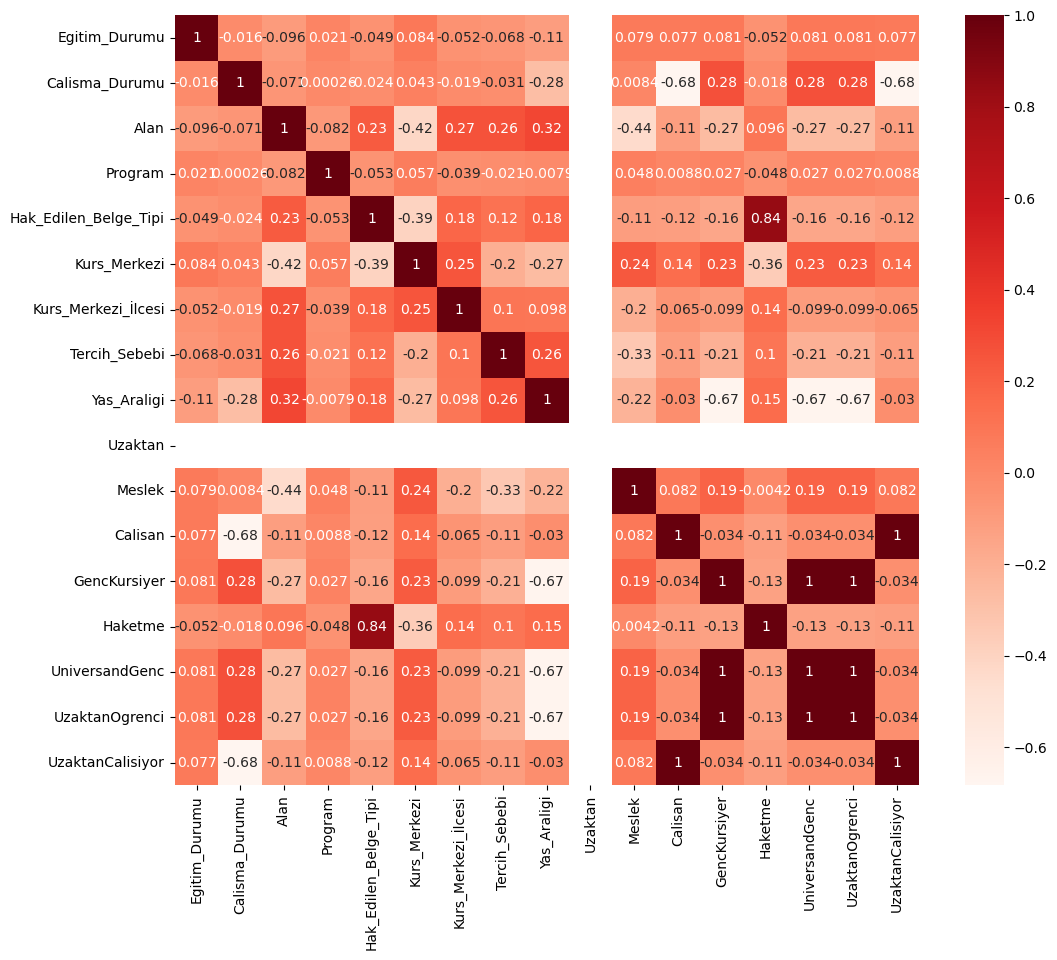

Hak_Edilen_Belge_Tipi    0.837317
Haketme                  1.000000
Name: Haketme, dtype: float64

In [69]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#Correlation with Target
cor_target = abs(cor["Haketme"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

### Aynıymış gibi gözüküyorlar yukarıdaki corr map e göre: 
    UzaktanCalisiyor = Calisan
    UniversandGenc = GencKursiyer = UzaktanOgrenci


In [72]:
X = df.drop(["Haketme", "Hak_Edilen_Belge_Tipi"],axis=1)
y = df.Haketme

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 104, stratify=df.Haketme)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     35809
           1       0.71      0.87      0.78      7227

    accuracy                           0.92     43036
   macro avg       0.84      0.90      0.86     43036
weighted avg       0.93      0.92      0.92     43036



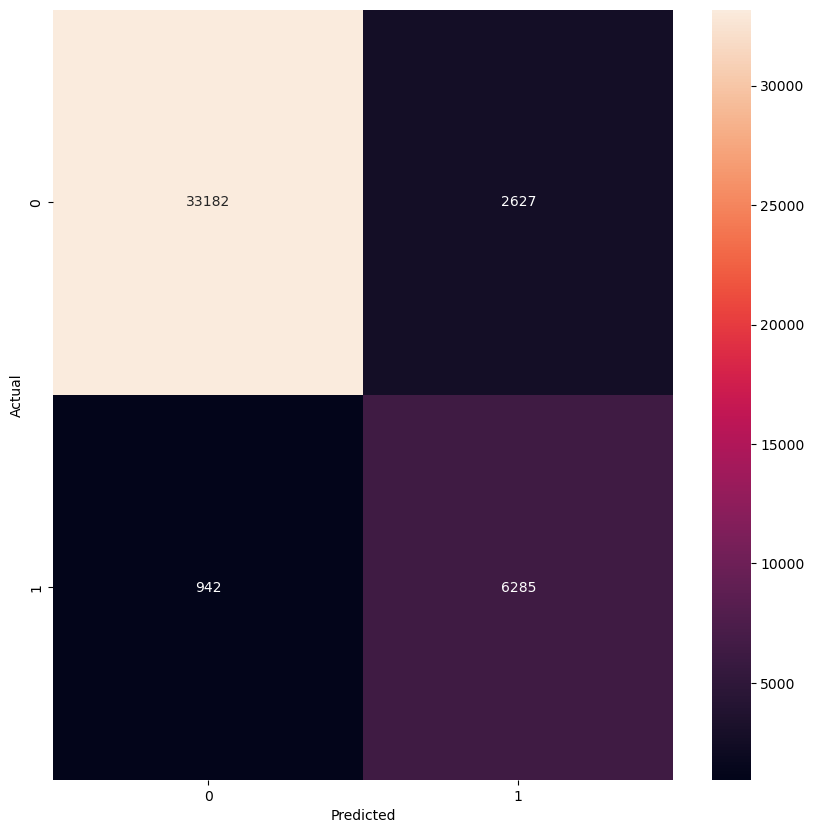

In [73]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train,y_train)

pred = xgb_cl.predict(X_test)
conf_mat = confusion_matrix(y_test, pred)
print(metrics.classification_report(y_test,pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

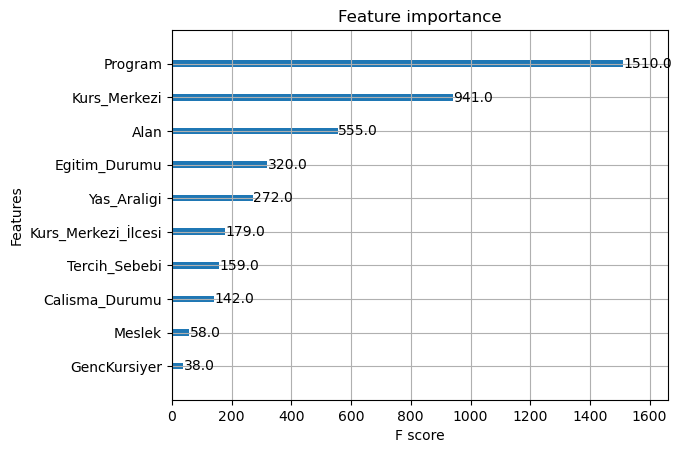

In [74]:
plot_importance(xgb_cl)

sonuç: modelin ilk hali fena değil ama geliştirmeler hep Alan üzerinden yapıldı. Haketme tahmini için de dataset biraz geliştirilebilir. ve sonrasında 2 model de projede sunulabilir.

In [75]:
df2.columns

Index(['Donem', 'Egitim_Durumu', 'Engel_Durumu', 'Calisma_Durumu', 'Alan',
       'Program', 'Hak_Edilen_Belge_Tipi', 'Kurs_Merkezi',
       'Kurs_Merkezi_İlcesi', 'Tercih_Sebebi', 'Yas_Araligi'],
      dtype='object')

In [76]:
df.columns

Index(['Egitim_Durumu', 'Calisma_Durumu', 'Alan', 'Program',
       'Hak_Edilen_Belge_Tipi', 'Kurs_Merkezi', 'Kurs_Merkezi_İlcesi',
       'Tercih_Sebebi', 'Yas_Araligi', 'Uzaktan', 'Meslek', 'Calisan',
       'GencKursiyer', 'Haketme', 'UniversandGenc', 'UzaktanOgrenci',
       'UzaktanCalisiyor'],
      dtype='object')

### Aynıymış gibi gözüküyorlar yukarıdaki corr map e göre: 
    UzaktanCalisiyor = Calisan
    UniversandGenc = GencKursiyer = UzaktanOgrenci
    aynı gözüktükleri için ve bunlar çalışma durumu içerisindeki kategoriler.(Öğrenci Çalışan)
    Calisma_Durumu, na one_hot_encoding uygulanabilir.

In [77]:
df2['Calisma_Durumu'].value_counts()

Calismiyor    103132
Calisiyor      58390
Ogrenci        47904
Emekli          5752
Name: Calisma_Durumu, dtype: int64

In [ ]:
Meslek
Tercih_Sebebi içinden seçilen bir sütun , one hot encoding yapmayı deneyelim
Haketme kalabilir. 

In [78]:
df2['Tercih_Sebebi'].value_counts()

Meslek Edinmek, Meslegimde İlerlemek              131358
Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek     42924
Uretim Yaparak Gelir Elde Etmek                    25702
Sosyal Cevre Edinmek                               15193
Yeni Bir Meslek Edinmek                                1
Name: Tercih_Sebebi, dtype: int64

        Eğitim Durumu, Ordinal olacak şekilde sıralanabilir, okumamış az okumuş tan çok okumuşa doğru, 0 1 2 
         - Bu diğer model için belki , Hak Edilen Belge Tipi de önem sırasına göre sıralanabilir
         Yas Aralığı, büyükten küçüğe gibi düşünsek ordinal olarak, 0 1 2 kendimiz sırasını belirleyebiliriz.
     
        Label ya da Target
     Alan Program Birbirinden çok farklı onlar belki labelden ayrı tutulup, target encoded kısmına saklanabilir.
     Kurs Merkezi, Kurs İlçesi aynı şekilde
     Uygulamak nasıl olur bu featurelara, çok farklılar birbirinden çünkü, sclae ederiz hem.
        import category_encoders as ce
        encoder = ce.PolynomialEncoder(cols=["engine_type"])
        encoder.fit_transform(obj_df, verbose=1).iloc[:,8:14].head() 
     
    - One Hot Encoding
         Tercih sebebinin bi önem sırası yok bu şekilde label encoding olabilir. 
                 ( önce Meslek Edinmek, Meslegimde İlerlemek + Yeni Bir Meslek Edinmek bunlar bir arada gruplandırılabişlr_ Meslek adı altında)
        Çalışma durumu 
        Hakedilen_Belge_Tipi ayrıca one hot encoder olabilir.

In [95]:
df2= df2.drop('Donem',axis=1)

In [96]:
#  ( önce Meslek Edinmek, Meslegimde İlerlemek + Yeni Bir Meslek Edinmek bunlar bir arada gruplandırılabişlr_ Meslek adı altında)
df2['Tercih_Sebebi'] = df2['Tercih_Sebebi'].replace(['Meslek Edinmek, Meslegimde İlerlemek','Yeni Bir Meslek Edinmek'], 'Meslek' )

In [97]:
df2['Tercih_Sebebi'].value_counts()

Meslek                                            131359
Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek     42924
Uretim Yaparak Gelir Elde Etmek                    25702
Sosyal Cevre Edinmek                               15193
Name: Tercih_Sebebi, dtype: int64

In [124]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
#onehot_encoder = OneHotEncoder(sparse=False)
#df2['Tercih_Sebebi'] = onehot_encoder.fit_transform(df2['Tercih_Sebebi'].values.reshape(-1,1)) # .values.reshape(-1,1)
#df2['Tercih_Sebebi'].info()

In [93]:
df2.head()

,Egitim_Durumu,Engel_Durumu,Calisma_Durumu,Alan,Program,Hak_Edilen_Belge_Tipi,Kurs_Merkezi,Kurs_Merkezi_İlcesi,Tercih_Sebebi,Yas_Araligi
0,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,0.0,20-30 Yas Arasi
1,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,1.0,20-30 Yas Arasi
2,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,0.0,30-40 Yas Arasi
3,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,1.0,20 Yas Alti
4,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,1.0,20 Yas Alti


## Seçilen Sütunlara One Hot Encoder uygulayalım
###  Tercih sebebi Çalışma durumu        H

In [98]:
## Tercih Sebebi
ho_tercih = OneHotEncoder()
ho_tercih_result = ho_tercih.fit_transform(df2[["Tercih_Sebebi"]])
pd.DataFrame(ho_tercih_result.toarray(), columns=ho_tercih.categories_).head()

,Meslek,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",Sosyal Cevre Edinmek,Uretim Yaparak Gelir Elde Etmek
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [99]:
df2 = df2.join(pd.DataFrame(ho_tercih_result.toarray(), columns=ho_tercih.categories_))

In [101]:
df2.head()

,Egitim_Durumu,Engel_Durumu,Calisma_Durumu,Alan,Program,Hak_Edilen_Belge_Tipi,Kurs_Merkezi,Kurs_Merkezi_İlcesi,Tercih_Sebebi,Yas_Araligi,"(Meslek,)","(Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek,)","(Sosyal Cevre Edinmek,)","(Uretim Yaparak Gelir Elde Etmek,)"
0,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,Meslek,20-30 Yas Arasi,1.0,0.0,0.0,0.0
1,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi,0.0,1.0,0.0,0.0
2,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,Meslek,30-40 Yas Arasi,1.0,0.0,0.0,0.0
3,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0.0,1.0,0.0,0.0
4,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0.0,1.0,0.0,0.0


In [103]:
# Çalışma Durumu
ho_calisma = OneHotEncoder()
ho_calisma_result = ho_calisma.fit_transform(df2[["Calisma_Durumu"]])
df2 = df2.join(pd.DataFrame(ho_tercih_result.toarray(), columns=ho_calisma.categories_))

In [111]:
# Haketme
def Haketme(df2):
    if df2["Hak_Edilen_Belge_Tipi"] == "Ismek Sertifika" or df2["Hak_Edilen_Belge_Tipi"] == "Meb Sertifika":
        return 1
    else:
        return 0
    
df2["Haketme"] = df2.apply(lambda df2:Haketme(df2), axis=1)
# bu yeni bir target sütunu mu oldu

  ## Ordinal Encoder yapalım
       Eğitim Durumu, Ordinal olacak şekilde sıralanabilir, okumamış az okumuş tan çok okumuşa doğru, 0 1 2 
         - Bu diğer model için belki , Hak Edilen Belge Tipi de önem sırasına göre sıralanabilir
         Yas Aralığı, büyükten küçüğe gibi düşünsek ordinal olarak, 0 1 2 kendimiz sırasını belirleyebiliriz.
     

In [114]:
df2['Egitim_Durumu'].value_counts()

Lisans                    88133
Lise                      44646
On Lisans                 33494
Ilkokul                   14655
Yuksek Lisans             12925
Ilkogretim                12009
Meslek Lisesi              6737
Doktora                    1092
Okur Yazar                  936
Okuma Yazma Bilmiyorum      551
Name: Egitim_Durumu, dtype: int64

In [129]:
# 'Ilkokul' 'Ilkogretim' birleştirilebilir
df2['Egitim_Durumu'].replace(to_replace = 'Ilkogretim', value = 'Ilkokul', inplace=True)
# 'Lise' 'Meslek Lisesi' birleştirilebilir
df2['Egitim_Durumu'].replace(to_replace = 'Meslek Lisesi', value = 'Lise', inplace=True)
# 'Okur Yazar'   genel bir ifade çıkarılabilir 
                     
#'Okuma Yazma Bilmiyorum' 'Ilkokul' 'Ilkogretim' 'Lise' 'On Lisans' 'Lisans' 'Yuksek Lisans'   'Doktora'      
# Okur yazarı bu sırada bir kategoriye dahil edemiyorum çıkarıyorum.
df2.drop(df2[(df2['Egitim_Durumu']=='Okur Yazar')].index, inplace=True)
 # bU sıraya göre ordinal encoding yapalım
#'Okuma Yazma Bilmiyorum' 'Ilkokul' 'Ilkogretim' 'Lise' 'On Lisans' 'Lisans' 'Yuksek Lisans'   'Doktora' 

In [130]:
df2['Egitim_Durumu'].value_counts()

Lisans                    88133
Lise                      51383
On Lisans                 33494
Ilkokul                   26664
Yuksek Lisans             12925
Doktora                    1092
Okuma Yazma Bilmiyorum      551
Name: Egitim_Durumu, dtype: int64

In [125]:
df2['Yas_Araligi'].value_counts()

20-30 Yas Arasi    93158
30-40 Yas Arasi    49211
40-50 Yas Arasi    36528
50-60 Yas Arasi    18918
20 Yas Alti        10438
60 Yas ustu         5989
Name: Yas_Araligi, dtype: int64

In [133]:
# sıralamak istediğimiz sırayı burada liste olarak veriyoruz
egitim_categories = ['Okuma Yazma Bilmiyorum', 'Ilkokul','Ilkogretim','Lise','On Lisans','Lisans','Yuksek Lisans','Doktora' ]
yas_categories = ['20 Yas Alti','20-30 Yas Arasi','30-40 Yas Arasi','40-50 Yas Arasi','50-60 Yas Arasi','60 Yas ustu']   

# Now, when you instantiate the encoder, both of these lists go in one big categories list:
encoder = OrdinalEncoder(categories=[egitim_categories, yas_categories])

df2[['Egitim_Durumu', 'Yas_Araligi']] = encoder.fit_transform(df2[['Egitim_Durumu', 'Yas_Araligi']])

In [134]:
df2.head()

,Egitim_Durumu,Engel_Durumu,Calisma_Durumu,Alan,Program,Hak_Edilen_Belge_Tipi,Kurs_Merkezi,Kurs_Merkezi_İlcesi,Tercih_Sebebi,Yas_Araligi,"(Meslek,)","(Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek,)","(Sosyal Cevre Edinmek,)","(Uretim Yaparak Gelir Elde Etmek,)","(Calisiyor,)","(Calismiyor,)","(Emekli,)","(Ogrenci,)",Haketme
0,5.0,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,Meslek,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,3.0,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,5.0,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,Meslek,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,5.0,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,5.0,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [136]:
X = df2.drop(["Haketme", "Hak_Edilen_Belge_Tipi"],axis=1)
y = df2.Haketme

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 104, stratify=df2.Haketme)

In [137]:
# geri kalanlar için burada target encoder yapıyorum
target_encoder = TargetEncoder()
X_train_encoded = target_encoder.fit_transform(X_train,y_train)
X_test_encoded = target_encoder.transform(X_test)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80     25146
           1       0.73      0.66      0.69     17703

    accuracy                           0.76     42849
   macro avg       0.75      0.74      0.75     42849
weighted avg       0.76      0.76      0.76     42849



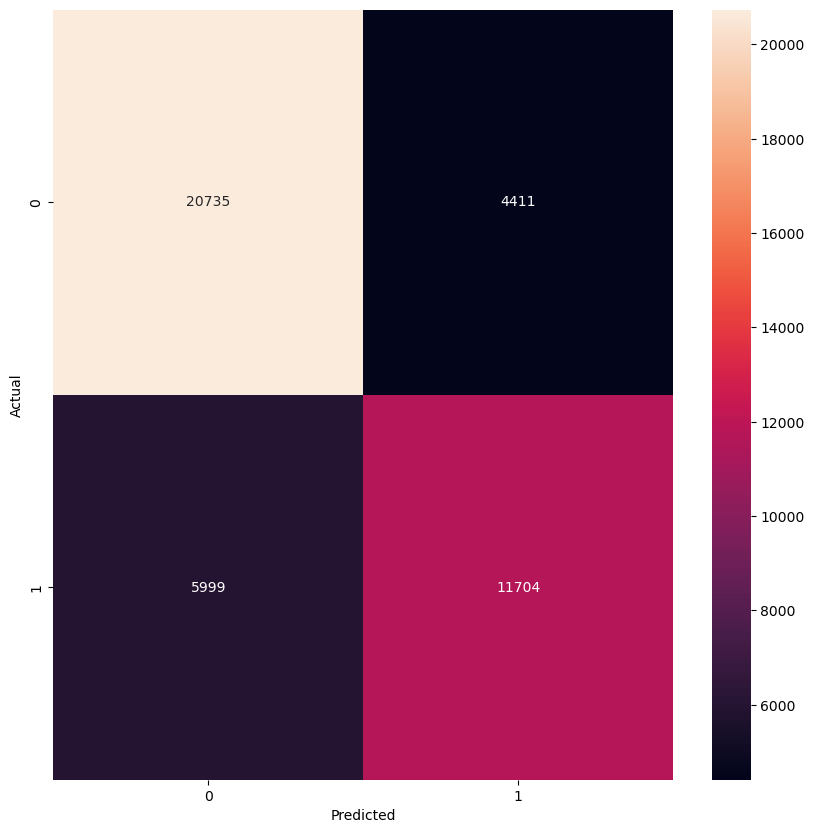

In [138]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train_encoded,y_train)

pred = xgb_cl.predict(X_test_encoded)
conf_mat = confusion_matrix(y_test, pred)
print(metrics.classification_report(y_test,pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

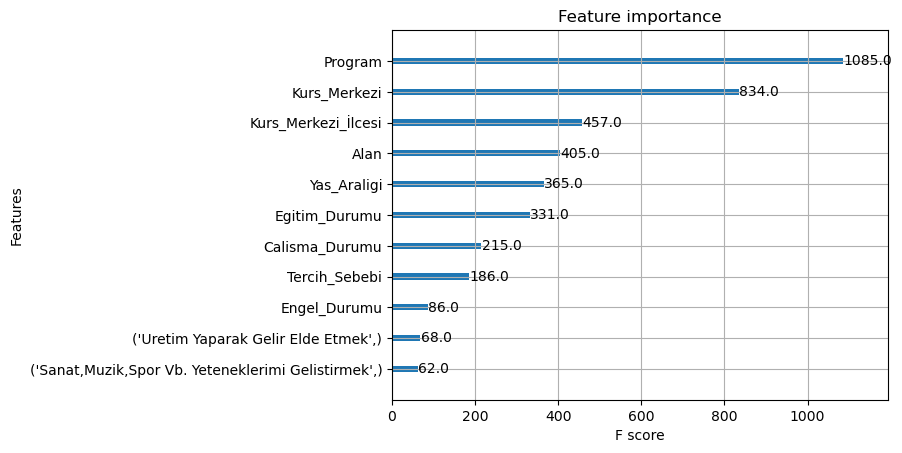

In [139]:
plot_importance(xgb_cl)